In [1]:
import pandas as pd

In [2]:
import healthcareai

In [3]:
import healthcareai.trained_models.trained_supervised_model as tsm_plots

In [4]:
import healthcareai.common.database_connections as hcai_db

In [5]:
dataframe = healthcareai.load_diabetes()

In [6]:
dataframe.head()

,PatientEncounterID,PatientID,SystolicBPNBR,LDLNBR,A1CNBR,GenderFLG,ThirtyDayReadmitFLG
0,1,10001,167.0,195.0,4.2,M,N
1,2,10001,153.0,214.0,5.0,M,N
2,3,10001,170.0,191.0,4.0,M,N
3,4,10002,187.0,135.0,4.4,M,N
4,5,10002,188.0,125.0,4.3,M,N


In [7]:
 dataframe.drop(['PatientID'], axis=1, inplace=True)

In [8]:
dataframe.head()

,PatientEncounterID,SystolicBPNBR,LDLNBR,A1CNBR,GenderFLG,ThirtyDayReadmitFLG
0,1,167.0,195.0,4.2,M,N
1,2,153.0,214.0,5.0,M,N
2,3,170.0,191.0,4.0,M,N
3,4,187.0,135.0,4.4,M,N
4,5,188.0,125.0,4.3,M,N


In [9]:
classification_trainer = healthcareai.SupervisedModelTrainer(
        dataframe=dataframe,
        predicted_column='ThirtyDayReadmitFLG',
        model_type='classification',
        grain_column='PatientEncounterID',
        impute=True,
        verbose=False)

In [12]:
print('\n\n-------------------[ Cleaned Dataframe ]--------------------------')
print(classification_trainer.clean_dataframe.head())



-------------------[ Cleaned Dataframe ]--------------------------
   SystolicBPNBR  LDLNBR  A1CNBR  ThirtyDayReadmitFLG  GenderFLG.M
0          167.0   195.0     4.2                    0            1
1          153.0   214.0     5.0                    0            1
2          170.0   191.0     4.0                    0            1
3          187.0   135.0     4.4                    0            1
4          188.0   125.0     4.3                    0            1


In [13]:
trained_knn = classification_trainer.knn()


Training KNN
KNN Grid: {'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'weights': ['uniform', 'distance']}
KNeighborsClassifier Training Results:
- Training time:
    Trained the KNeighborsClassifier model in 0.41 seconds
- Best hyperparameters found were:
    {'weights': 'distance', 'n_neighbors': 20}
- KNeighborsClassifier performance metrics:
    Accuracy: 0.84
    ROC AUC: 0.70
    PR AUC: 0.42


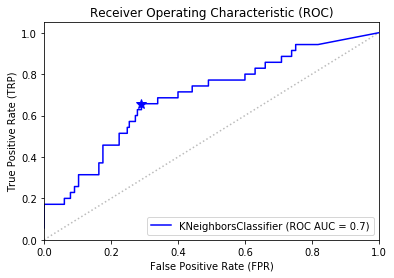

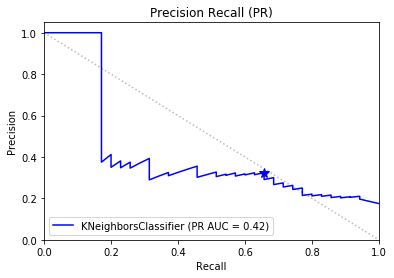

In [15]:
trained_knn.roc_plot()
trained_knn.pr_plot()

In [16]:
trained_lr = classification_trainer.logistic_regression()


Training Logistic Regression
LogisticRegression Training Results:
- Training time:
    Trained the LogisticRegression model in 0.01 seconds
- Best hyperparameters found were:
    N/A: No hyperparameter search was performed
- LogisticRegression performance metrics:
    Accuracy: 0.82
    ROC AUC: 0.75
    PR AUC: 0.35


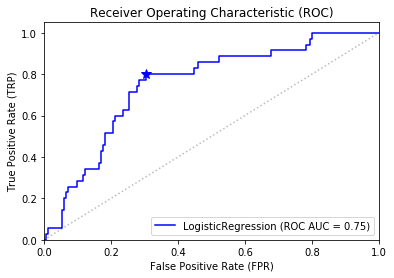

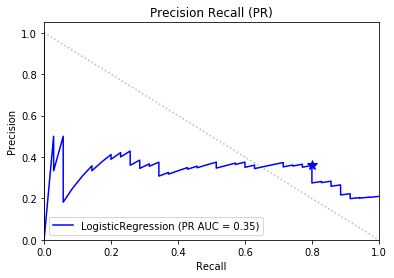

In [18]:
trained_lr.roc_plot()
trained_lr.pr_plot()